<div style="border: 10px solid #3498db; border-radius: 30px; padding: 40px; box-shadow: 10px 10px 25px #2980b9; background: linear-gradient(to bottom right, #D6EAF8, #EBF5FB);">
    <h2 style="font-size: 34px; font-weight: bold; color: #0E6655; text-align: center; border-bottom: 5px solid #F1C40F; font-family: 'Arial'; padding: 20px; margin-top: 0; box-shadow: 5px 5px 15px #7D8A99; background-color: #FEF5E7; border-radius: 20px;"> MADC Internship Program Generic </h2>
    <ul style="font-size: 18px; font-family: 'Calibri'; padding: 30px; line-height: 1.7; list-style-type: none;">
        <li>📌 <strong style="color: #0E6655;">ML-Tweets Classification</strong> </li>
        <li>📄 <strong style="color: #0E6655;"> Candidate Information </strong>
            <ul>
                <li>Full Name : DAH Abdallahi</li>
                <li>Team Name : PGX-DS-T20081</li>
                <li>User Name : ORCL-DS-APP </li>
                <br><br>
            </ul>
        </li>
    </ul>

    
</div>

# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:center; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'></span></b> <b>Table of Content</b></div>

* [1. Importing Libraries](#1)
* [2. Loading Data](#2)
* [3. EDA](#3)
* [4. Data Preprocessing](#4)
* [5. Model Training](#5)
* [6. Hyper-Parameter tuning](#6)
* [7. Performance Evaluation](#7)
* [8. Submission Data Preparation](#8)

# 1| Importing Libraries

In [ ]:
import pandas as pd
import spacy
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import nltk
nltk.download('wordnet', quiet=True)
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import collections
from collections import Counter
import en_core_web_sm

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM, Embedding
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')

.

# 2 | Loading Data

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train_df.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [ ]:
test_df.head()

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


In [ ]:
sub

,TweetId,Label
0,13439423987429,Sports
1,48523497520948,Politics
2,183749287598,Sports
3,12749274958729,Sports


.

<h1> 3 | EDA </h1>

In [ ]:
print('The shape of Train data : ',train_df.shape)
print('The shape of test data : ',test_df.shape)

The shape of Train data :  (6525, 3)
The shape of test data :  (2610, 2)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [ ]:
# Display missing values in each column
missing_values = train_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
TweetId      0
Label        0
TweetText    0
dtype: int64


Visualize the class distribution in the dataset using a bar plot with counts displayed on top of each bar.

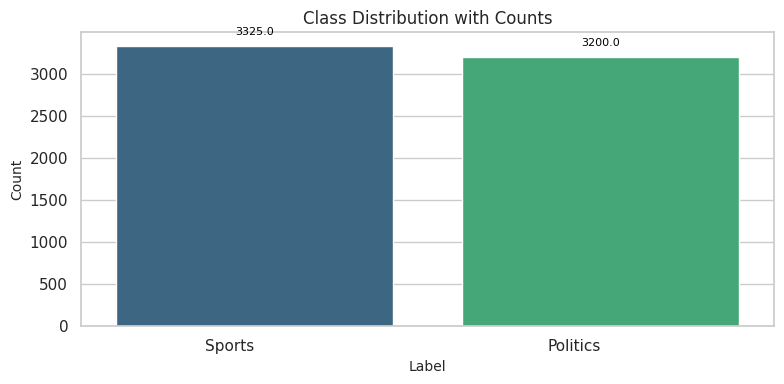

In [ ]:
#sns.countplot(data=train_df,x='Label');
class_distribution = train_df['Label'].value_counts()

# Set a seaborn style
sns.set(style="whitegrid")

# Plot the class distribution with counts on top of each bar
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Class Distribution with Counts', fontsize=12)
plt.xlabel('Label', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

Visualize the distribution of tweet categories using a pie chart with percentage labels.


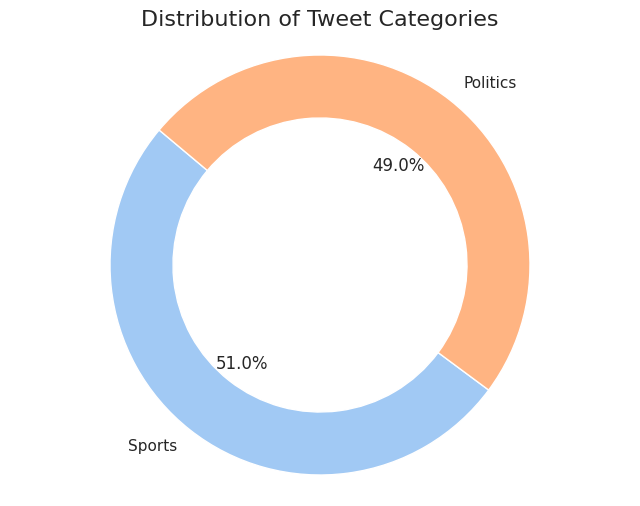

In [ ]:
# Count the number of tweets per category
labels_counts = train_df['Label'].value_counts()

# Set a seaborn style
sns.set(style="whitegrid")

# Create a pie chart with a color palette
colors = sns.color_palette('pastel')
plt.figure(figsize=(8, 6))
plt.pie(labels_counts, labels=labels_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Add a title
plt.title('Distribution of Tweet Categories', fontsize=16)

# Set aspect ratio to be equal for a perfect circle
plt.axis('equal')

# Show the pie chart
plt.show()

.

 <h1> 4 | Data Preprocessing </h1>

#### Improved function for preprocessing a single text

In [ ]:
# Initialize the stemmer
import nltk
nltk.download('punkt')

stemmer = PorterStemmer()

# Function to preprocess a single text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove non-word characters and extra spaces
    text = re.sub(r'\W', ' ', text)

    # Remove single characters and words that start with a single character
    text = re.sub(r'\b[a-zA-Z]\b|\^[a-zA-Z]\s+', ' ', text)

    # Remove the 'b' at the beginning of the text (if it exists)
    text = re.sub(r'^b\s+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Apply stemming to each word
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Join the processed words back into a sentence
    processed_text = ' '.join(stemmed_tokens)

    return processed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train_df['ProcessedTweetText'] = train_df['TweetText'].apply(preprocess_text)
test_df['ProcessedTweetText'] = test_df['TweetText'].apply(preprocess_text)

In [ ]:
train_df.head()

,TweetId,Label,TweetText,ProcessedTweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerri the valu of the statedept and usaid i...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina1481 fear so
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlight of the wwc13 final betwe...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,rt chelscanlan at nitro circu at albertpark th...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox alway good thing thank for the feed...


#### Vectorization and Encoding Data

<br>
Replace categorical labels with numerical encoding for the 'Label' column in the DataFrame.


In [ ]:
label_mapping = {'Politics': 0, 'Sports': 1}

# Use the 'replace' method to create a new column 'label_enc' based on the specified mapping
train_df['label_enc'] = train_df['Label'].replace(label_mapping)

train_df.head()

,TweetId,Label,TweetText,ProcessedTweetText,label_enc
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerri the valu of the statedept and usaid i...,0
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina1481 fear so,0
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlight of the wwc13 final betwe...,1
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,rt chelscanlan at nitro circu at albertpark th...,1
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox alway good thing thank for the feed...,1


In [ ]:
# Extracting feature and target variables for model training
X = train_df['ProcessedTweetText']  # Features (processed tweet text)
y = train_df['label_enc']            # Target variable (encoded labels)


# Using TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X).toarray()

In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y, test_size=0.2, random_state=42)

.

<h1> 5 | Model Training</h1>

#### MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_vectorized, y)
nb_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_test, nb.predict(X_test))
print('nb_acc : ',nb_acc )

nb_acc :  0.9915708812260536


#### LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print('lr_acc : ',lr_acc )

lr_acc :  0.9455938697318008


#### LinearSVC

In [ ]:
svc = LinearSVC()
svc.fit(X_train_vectorized, y)
svc_pred = svc.predict(X_test)

svc_acc = accuracy_score(y_test, svc_pred)
print('svc_acc : ',svc_acc )

svc_acc :  1.0


 #### XGBoost model

In [ ]:
# XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xbg_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, xbg_pred)
print('xgb_acc : ',xgb_acc )

xgb_acc :  0.9042145593869731


#### LSTM

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['ProcessedTweetText'])
total_words = len(tokenizer.word_index) + 1

# Convert text data to sequences
sequences = tokenizer.texts_to_sequences(train_df['ProcessedTweetText'])
max_sequence_length = max(len(seq) for seq in sequences)

# Pad sequences for consistent input shape
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')



# Split the data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(padded_sequences, train_df['label_enc'], test_size=0.2, random_state=84)

# Build the LSTM model
embedding_dim = 10  # Adjust as needed
units_lstm = 40    # Adjust as needed

model = Sequential()
model.add(Embedding(total_words, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units_lstm))
model.add(Dropout(0.2))  # Optional dropout layer for regularization
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=10, validation_split=0.1)

# Evaluate the model
loss, accuracy_lstm = model.evaluate(X_test_lstm, y_test_lstm)
print('\n')
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy_lstm:.4f}')

Epoch 1/10
147/147 [==============================] - 6s 22ms/step - loss: 0.5700 - accuracy: 0.6396 - val_loss: 0.2537 - val_accuracy: 0.9042
Epoch 2/10
147/147 [==============================] - 2s 16ms/step - loss: 0.1296 - accuracy: 0.9536 - val_loss: 0.1997 - val_accuracy: 0.9138
Epoch 3/10
147/147 [==============================] - 2s 15ms/step - loss: 0.0323 - accuracy: 0.9904 - val_loss: 0.2242 - val_accuracy: 0.9387
Epoch 4/10
147/147 [==============================] - 2s 17ms/step - loss: 0.0112 - accuracy: 0.9977 - val_loss: 0.2065 - val_accuracy: 0.9406
Epoch 5/10
147/147 [==============================] - 3s 21ms/step - loss: 0.0067 - accuracy: 0.9991 - val_loss: 0.2556 - val_accuracy: 0.9387
Epoch 6/10
147/147 [==============================] - 3s 19ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.3032 - val_accuracy: 0.9291
Epoch 7/10
147/147 [==============================] - 2s 16ms/step - loss: 7.5601e-04 - accuracy: 1.0000 - val_loss: 0.3429 - val_accuracy: 0.

.

<h1> 6 | Hyper-Parameter tuning </h1>

In the Hyperparameter Tuning phase, we leveraged Grid Search, a methodical exploration approach, on each classical machine learning model. The primary goal was to meticulously fine-tune the model's hyperparameters, aiming to pinpoint the most effective configuration for optimal performance.

#### LinearSVC

In [ ]:
# Define the parameter grid for LinearSVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'dual': [False]
}

# Initialize and train LinearSVC classifier
svc_classifier = LinearSVC()
svc_grid_search = GridSearchCV(svc_classifier, svc_param_grid, cv=5, n_jobs=-1)
svc_grid_search.fit(X_train, y_train)

# Get the best LinearSVC classifier
best_svc_classifier = svc_grid_search.best_estimator_
print('Best hyperparameters for LinearSVC:', svc_grid_search.best_params_)

Best hyperparameters for LinearSVC: {'C': 1, 'dual': False, 'penalty': 'l2'}


#### MultinomialNB

In [ ]:
# Define the parameter grid for MultinomialNB
nb_param_grid = {
'alpha': [1, 2, 4],
'fit_prior': [True, False]
}

# Initialize and train MultinomialNB classifier
nb_classifier = MultinomialNB()
nb_grid_search = GridSearchCV(nb_classifier, nb_param_grid, cv=5, n_jobs=-1)
nb_grid_search.fit(X_train, y_train)

# Get the best NB classifier
best_nb_classifier = nb_grid_search.best_estimator_
print('best hyperparameters for MultinomialNB', nb_grid_search.best_params_)


best hyperparameters for MultinomialNB {'alpha': 1, 'fit_prior': True}


#### LogisticRegression

In [ ]:
# Define the parameter grid for LogisticRegression
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Initialize and train LogisticRegression classifier
lr_classifier = LogisticRegression()
lr_grid_search = GridSearchCV(lr_classifier, lr_param_grid, cv=5, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

# Get the best LogisticRegression classifier
best_lr_classifier = lr_grid_search.best_estimator_
print('Best hyperparameters for LogisticRegression:', lr_grid_search.best_params_)

Best hyperparameters for LogisticRegression: {'C': 10, 'penalty': 'l2'}


#### XGBClassifier

In [ ]:
# Define the parameter grid for XGBClassifier
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Initialize and train XGBClassifier classifier
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Get the best LogisticRegression classifier
best_xgb_classifier = grid_search.best_estimator_
print('Best hyperparameters for LogisticRegression:', grid_search.best_params_)

Best hyperparameters for LogisticRegression: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}


.

<h1> 7 | Performance Evaluation  </h1>

In the Prediction and Performance Models section, we utilized the best_estimator_ model obtained after the rigorous Hyperparameter Tuning process. By selecting the optimal parameters identified through Grid Search, we made predictions for each model and calculated the corresponding accuracy.

In [ ]:
# Make predictions on the testing data
best_nb_test_pred = best_nb_classifier.predict(X_test)
best_lr_test_pred = best_lr_classifier.predict(X_test)
best_svc_test_pred = best_svc_classifier.predict(X_test)
best_xgb_test_pred = best_xgb_classifier.predict(X_test)

In [ ]:
# Calculate accuracy for each model
best_nb_acc = accuracy_score(y_test, best_nb_test_pred)
best_lr_acc = accuracy_score(y_test, best_lr_test_pred)
best_svc_acc = accuracy_score(y_test, best_svc_test_pred)
best_xgb_acc = accuracy_score(y_test, best_xgb_test_pred)

In [ ]:
resul_best_model = [best_nb_acc,best_lr_acc,best_svc_acc,best_xgb_acc]
result_model = [nb_acc,lr_acc,svc_acc,xgb_acc]
models = ['Multinomial Naive Bayes','Logistic Regression','Linear SVC','XGBoost']

result = pd.DataFrame(models,columns = ['Models'])
result['result_model'] = result_model
result['resul_best_model'] = resul_best_model


df_result = result.sort_values(by='resul_best_model', ascending=False)
df_result

,Models,result_model,resul_best_model
0,Multinomial Naive Bayes,0.965517,0.965517
2,Linear SVC,0.964751,0.964751
1,Logistic Regression,0.945594,0.960920
3,XGBoost,0.904215,0.907280


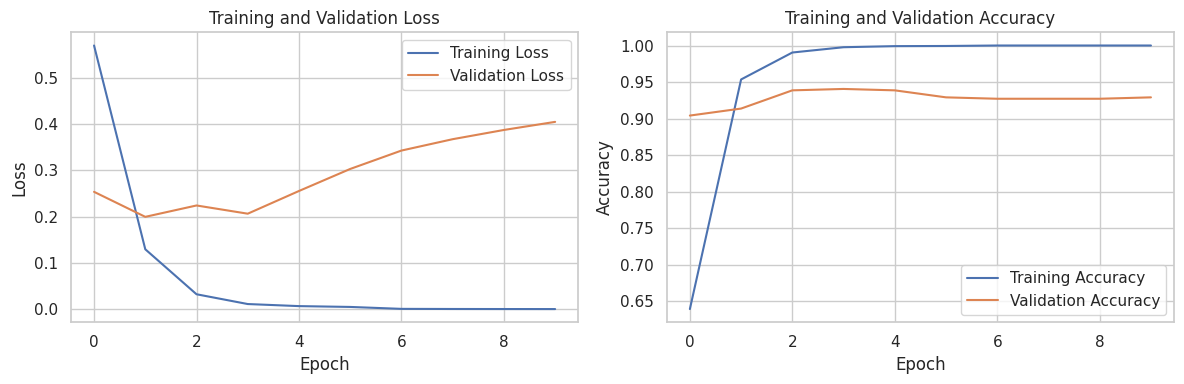

In [ ]:
# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

.

# 8 | Submission Data Preparation

In this section dedicated to submission data preparation, we will leverage the performance results of the evaluated models and opt for the Naive Bayes (NB) model to make predictions on the test data for submission. The NB model has exhibited promising performance during evaluation, and we will utilize its predictive capabilities to generate the final labels for submission.

In [ ]:
# Extracting processed tweet text from the test dataset
subm_data = test_df['ProcessedTweetText']

# Vectorization
subm_data = vectorizer.transform(subm_data).toarray()

# Making predictions on the test data using the Naive Bayes (NB) model ('nb').
nb_pred_sub = nb.predict(subm_data)

# Print the predicted labels for further examination
print(nb_pred_sub)

[1 1 0 ... 1 0 0]


In [ ]:
# Converting numerical predictions back to original labels using the inverse mapping dictionary.
inverse_mapping = {0: 'Politics', 1: 'Sports'}
result = [inverse_mapping[label] for label in nb_pred_sub]

# Creating a DataFrame for submission with 'TweetId' and the predicted labels.
submission_df = pd.DataFrame({'TweetId': test_df['TweetId'], 'Label': result})

# Exporting the submission DataFrame to a CSV file.
submission_df.to_csv('submission_final(15).csv', index=False)

In [ ]:
submission_df.head()

,TweetId,Label
0,306486520121012224,Sports
1,286353402605228032,Sports
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Sports


In [ ]:
!jupyter nbconvert --to html DAH_Abdallahi.ipynb

[NbConvertApp] Converting notebook DAH_Abdallahi.ipynb to html
[NbConvertApp] Writing 863965 bytes to DAH_Abdallahi.html
